In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load tweet_emotions data set.

In [ ]:
df = pd.read_csv("sample_data/tweet_emotions.csv")

Print data frame.

In [ ]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


Print the first five columns.

In [ ]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Print all of the columns of the data frame.

In [ ]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

Print the number of sentiment words.

In [ ]:
temp = df.groupby('sentiment').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,content
8,neutral,8638
12,worry,8459
5,happiness,5209
10,sadness,5165
7,love,3842
11,surprise,2187
4,fun,1776
9,relief,1526
6,hate,1323
2,empty,827


Print data above as a bar graph.

<Axes: xlabel='sentiment', ylabel='count'>

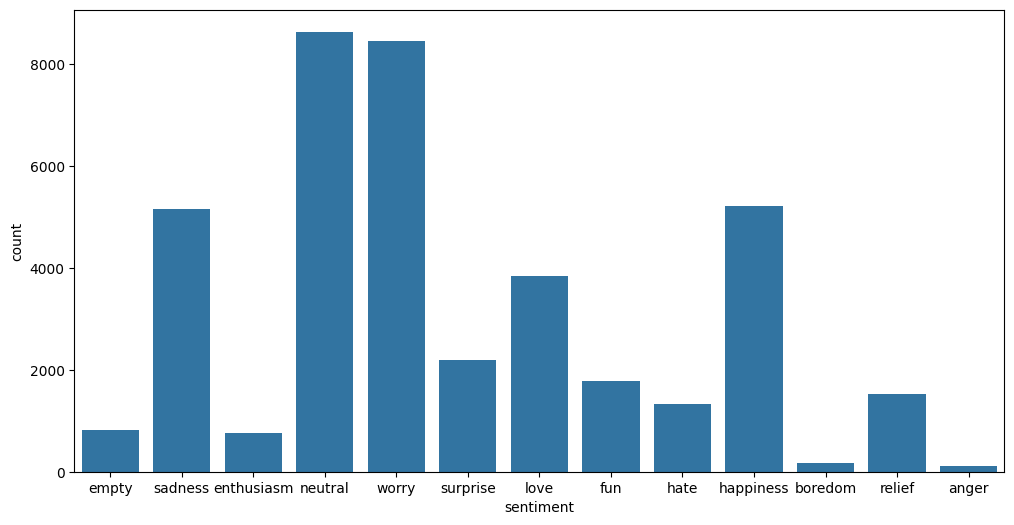

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

Print common words.

In [ ]:
df['temp_list'] = df['content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['content','temp_list']
temp.style.background_gradient(cmap='Blues')

,content,temp_list
0,to,14039
1,I,12635
2,the,12052
3,a,9352
4,my,7160
5,and,6750
6,i,6257
7,you,5535
8,is,5254
9,for,5146


Print most common words, ignoring stop words.

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))

In [ ]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp = temp.iloc[1:,:]
temp.columns = ['content','temp_list']
temp.style.background_gradient(cmap='Purples')

,content,temp_list
1,I'm,2440
2,get,1934
3,like,1808
4,day,1737
5,-,1730
6,go,1558
7,good,1505
8,got,1453
9,going,1305
10,love,1252


Print table just for sentiment 'empty'.

In [ ]:
df[df['sentiment']=='empty']

,tweet_id,sentiment,content,temp_list
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[@tiffanylue, know, listenin, bad, habit, earl..."
44,1956978276,empty,@creyes middle school and elem. High schools w...,"[@creyes, middle, school, elem., High, schools..."
52,1956979917,empty,@djmicdamn hey yu lil fucker i textd yu,"[@djmicdamn, hey, yu, lil, fucker, textd, yu]"
141,1957000336,empty,@softtouchme just answered you- never learned ...,"[@softtouchme, answered, you-, never, learned,..."
180,1957007357,empty,Have a headache I'm going to bed. Goodnight!,"[Have, headache, I'm, going, bed., Goodnight!]"
...,...,...,...,...
39702,1753868848,empty,"Here we go again, back to work. Happy Mothers ...","[Here, go, again,, back, work., Happy, Mothers..."
39742,1753870123,empty,@PhilippaJane the &quot;no pants&quot; idea co...,"[@PhilippaJane, &quot;no, pants&quot;, idea, c..."
39749,1753870555,empty,@sloanyxxx Thanks,"[@sloanyxxx, Thanks]"
39845,1753886183,empty,@xxxRobyn Yeah *fingers crossed*,"[@xxxRobyn, Yeah, *fingers, crossed*]"


Get general info about data frame.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
 3   temp_list  40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None


Describes the numerics.

In [ ]:
print(df.describe())

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09


Distribution of sentiments.

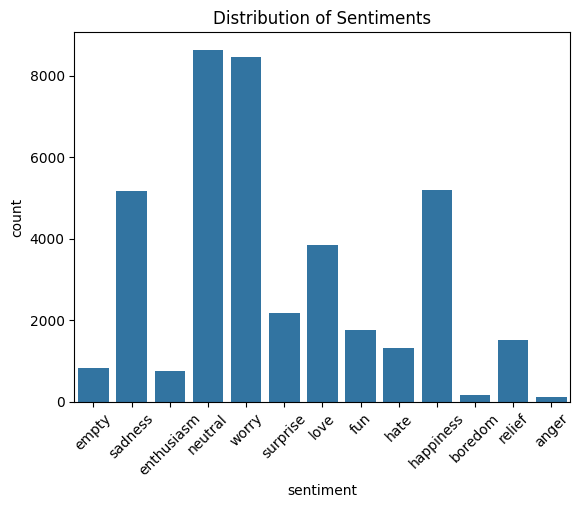

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)
plt.show()

Content length by sentiment.

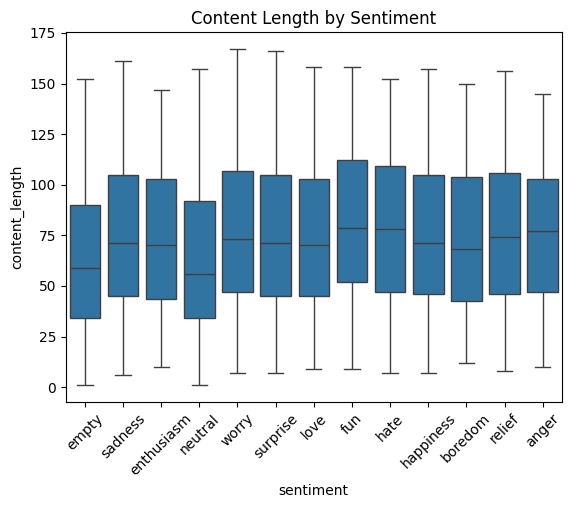

In [ ]:
df['content_length'] = df['content'].apply(len)
sns.boxplot(x='sentiment', y='content_length', data=df)
plt.title('Content Length by Sentiment')
plt.xticks(rotation=45)
plt.show()

Word cloud of most common words.

In [ ]:
specific_sentiments = df[df['sentiment'].isin(['sadness', 'worry', 'hate', 'fun'])]
specific_sentiments = specific_sentiments.copy()

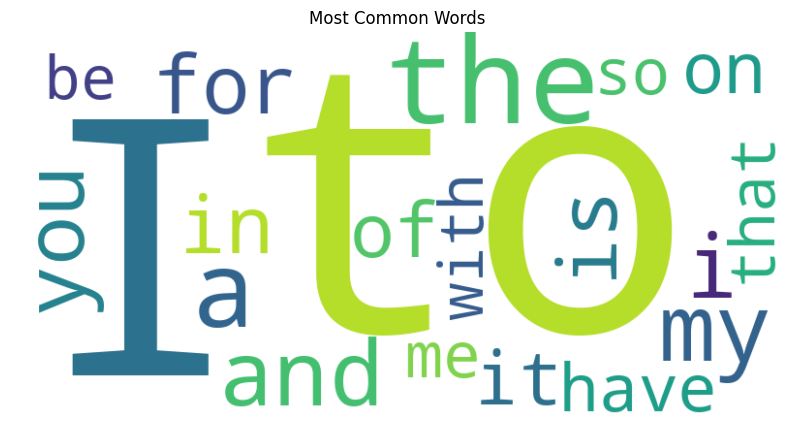

In [ ]:
all_text = ' '.join(df['content'])
words = all_text.split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words')
plt.axis('off')
plt.show()

Word cloud for 4 most dominant sentiments.

In [ ]:
print(df['sentiment'].unique())
specific_sentiments = df[df['sentiment'].isin(['sadness', 'worry', 'hate', 'fun'])]
all_text_specific = ' '.join(specific_sentiments['content'])
words_specific = all_text_specific.split()
word_freq_specific = Counter(words_specific)
common_words_specific = word_freq_specific.most_common(20)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


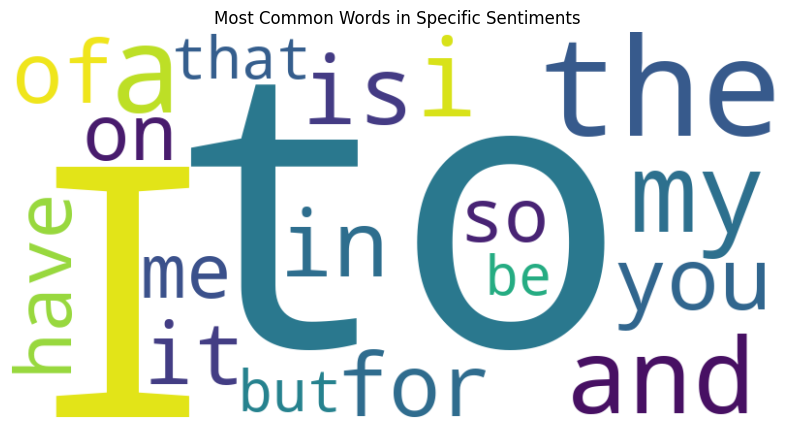

In [ ]:
wordcloud_specific = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words_specific))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_specific, interpolation='bilinear')
plt.title('Most Common Words in Specific Sentiments')
plt.axis('off')
plt.show()

Content length comparison for similar sentiments.

In [ ]:
specific_sentiments = df[df['sentiment'].isin(['sadness', 'worry', 'hate', 'love', 'fun', 'neutral'])]

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Sadness vs Worry')

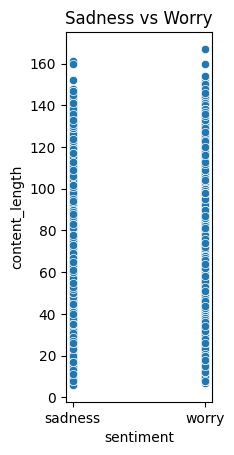

In [ ]:
plt.subplot(1, 3, 1)
sns.scatterplot(x='sentiment', y='content_length', data=specific_sentiments[specific_sentiments['sentiment'].isin(['sadness', 'worry'])])
plt.title('Sadness vs Worry')

Text(0.5, 1.0, 'Hate vs Love')

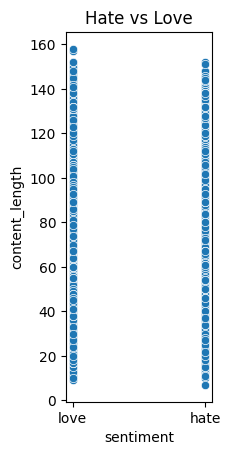

In [ ]:
plt.subplot(1, 3, 2)
sns.scatterplot(x='sentiment', y='content_length', data=specific_sentiments[specific_sentiments['sentiment'].isin(['hate', 'love'])])
plt.title('Hate vs Love')

Text(0.5, 1.0, 'Fun vs Neutral')

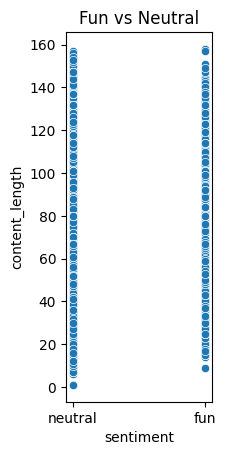

In [ ]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='sentiment', y='content_length', data=specific_sentiments[specific_sentiments['sentiment'].isin(['fun', 'neutral'])])
plt.title('Fun vs Neutral')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>